# Maven Music Project

# Problem Statement
***Maven Music, is a streaming service that's been losing more customers than usual in the past few months. They would like to use data science to figure out how to reduce customer churn***
##### Objectives:
1.	Gather data
2.	Clean data
3.	Explore data
4.	Visualize
5.	Share Insights
6.	Prepare Data for Modelling 

## 1. Scope of the Project

To use a supervised learning technique to predict which customers are most likely to cancel their subscription of Maven Music platform using **the past three months of customer data which includes subscription and listening history**.

## 2. Reading Data to Python

**Data gathered and stored into a csv and xlsx file**
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [296]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rc('font', family='Garamond', size=12, weight='normal')
plt.rc('axes', titleweight='normal', titlesize=14)
plt.rc('figure', titleweight='bold', titlesize=20)

In [297]:
# Reading customer data
customer_data = pd.read_csv("../Data/maven_music_customers.csv")
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [298]:
# Reading listening history
listening_history = pd.read_excel("../Data/maven_music_listening_history.xlsx", sheet_name='listening_history')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [299]:
# Reading audio data from maven_music_listening_history.xlsx sheet 2
audio_files = pd.read_excel("../Data/maven_music_listening_history.xlsx", sheet_name='audio_files')
audio_files.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [300]:
# Reading session data from maven_music_listening_history.xlsx sheet 3
session_login = pd.read_excel("../Data/maven_music_listening_history.xlsx", sheet_name='session_login_time')
session_login.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Cleaning Data

### a. Data Types Conversion

In [301]:
# Check the data types customer_data
customer_data.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [302]:
# Check the data types listening_history
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [303]:
# Check the data types audio_files
audio_files.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [304]:
# Check the data types session_login
session_login.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [305]:
# Convert objects to numeric and datetime fields in customer_data
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [ ]:
customer_data["Subscription Rate"] = customer_data["Subscription Rate"].astype('str').str.lstrip('$').astype('float')
customer_data['Member Since'] = pd.to_datetime(customer_data['Member Since'], errors='coerce')
customer_data['Cancellation Date'] = pd.to_datetime(customer_data['Cancellation Date'], errors='coerce')

In [307]:
# Data types after conversion
customer_data.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [308]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


### b. Missing Data

**Look for missing values in our datasets**

In [309]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [310]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [311]:
audio_files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [312]:
session_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


###### It appears the customer data has null values in Subscription Plan, Discount and Cancellation Date columns
###### Missing Values in Cancellation date means a client has not cancelled their subscription
###### Lets start with handling missing values in Subscription Plan column

In [313]:
#There are 5 missing values in the subscription plan column
customer_data['Subscription Plan'].value_counts(dropna=False)

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
NaN                  5
Name: count, dtype: int64

In [314]:
# It appears all NaN value in the Subscription Plan column have a common Subscription Rate of 2.99
customer_data[customer_data['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [315]:
# A Subscription Rate of 2.99 is for a basic plan hence we can fill our NaN values with a Basic Subscription Plan
customer_data[['Subscription Plan', 'Subscription Rate']].drop_duplicates()

,Subscription Plan,Subscription Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


In [316]:
#filling NaN values in Subscription Plan column with Basic plan
customer_data['Subscription Plan'] = customer_data['Subscription Plan'].fillna('Basic (Ads)')

###### Handling missing values in Discount? column

In [317]:
# There are only two unique values in Discount column, hence NaN could mean no discount - No
customer_data['Discount?'].value_counts(dropna=False)

Discount?
NaN    23
Yes     7
Name: count, dtype: int64

In [318]:
# Replacing NaN values in Discount column with No
customer_data['Discount?'] = np.where(customer_data['Discount?'].isna(), 'No', customer_data['Discount?'])

In [319]:
#Missing data cleaned
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


#### c. Cleaning Inconsistent Text & Typos

***i. Inconsistent Text & Typos in Customer Data***

In [320]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


In [321]:
#Removing the word email from the begining of each Email column value
customer_data['Email'] = customer_data['Email'].astype('str').str.lstrip('Email:')

In [322]:
#Subscription Plan column seems okay
customer_data['Subscription Plan'].value_counts(dropna=False)

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [323]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


***ii.Inconsistent Text & Typos in listening history***

In [324]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [325]:
#Listening history data appears okay
listening_history['Audio Type'].value_counts(dropna=True)

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

***iii.Inconsistent Text & Typos in audio files data***

In [326]:
audio_files.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [327]:
# Aligning the genre column of the audio_files dataset: pop music == pop
audio_files['Genre'].value_counts(dropna=False)

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [328]:
audio_files['Genre'] = np.where(audio_files['Genre']=='Pop Music', 'Pop', audio_files['Genre'])

In [329]:
audio_files['Genre'].value_counts(dropna=False)

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

***iv.Inconsistent Text & Typos in session login data***

In [330]:
#Session login data appears okay
session_login.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


#### d. Handling Duplicate Rows

***i. Looking for duplicate rows in customer_data***

In [331]:
# Customer data has no duplicated rows
customer_data[customer_data.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


***ii. Looking for duplicate rows in listening history***

In [332]:
# Listening history has no diplicated rows
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


***iii. Looking for duplicate rows in audio files data***

In [333]:
# Audio data has no duplicated values
audio_files[audio_files.duplicated()]

,ID,Name,Genre,Popularity


***iv. Looking for duplicate rows in session login data***

In [334]:
#Session login data has no duplicated values
session_login[session_login.duplicated()]

,Session ID,Session Log In Time


#### e. Handling Outliers

***i. Looking for outliers in customer data***

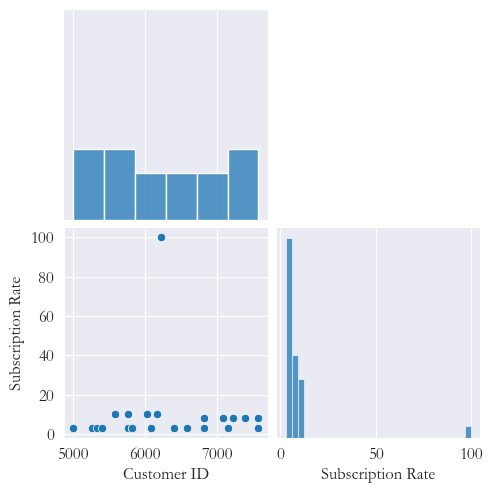

In [335]:
# It seems there is an outlier in the subscription rate
sns.pairplot(data=customer_data, corner=True);

In [336]:
# Viewing the outlier in our dataset. It seems to be a premium subscription plan
customer_data[customer_data['Subscription Rate']>20.00]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,No,2023-06-02


In [337]:
# it seems our outlier must have been a typo when capturing the rate
customer_data.loc[customer_data['Subscription Plan']=='Premium (No Ads)', ['Subscription Plan', 'Subscription Rate']].head(8)

,Subscription Plan,Subscription Rate
6,Premium (No Ads),9.99
7,Premium (No Ads),9.99
8,Premium (No Ads),9.99
12,Premium (No Ads),9.99
14,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99
22,Premium (No Ads),7.99


In [338]:
# Handlin the outlier
customer_data.loc[customer_data['Subscription Rate']==99.99, 'Subscription Rate'] = 9.99

In [339]:
customer_data.loc[customer_data['Subscription Plan']=='Premium (No Ads)', ['Subscription Plan', 'Subscription Rate']].head(8)

,Subscription Plan,Subscription Rate
6,Premium (No Ads),9.99
7,Premium (No Ads),9.99
8,Premium (No Ads),9.99
12,Premium (No Ads),9.99
14,Premium (No Ads),9.99
15,Premium (No Ads),9.99
21,Premium (No Ads),7.99
22,Premium (No Ads),7.99


***ii. Looking for outliers in listening history***

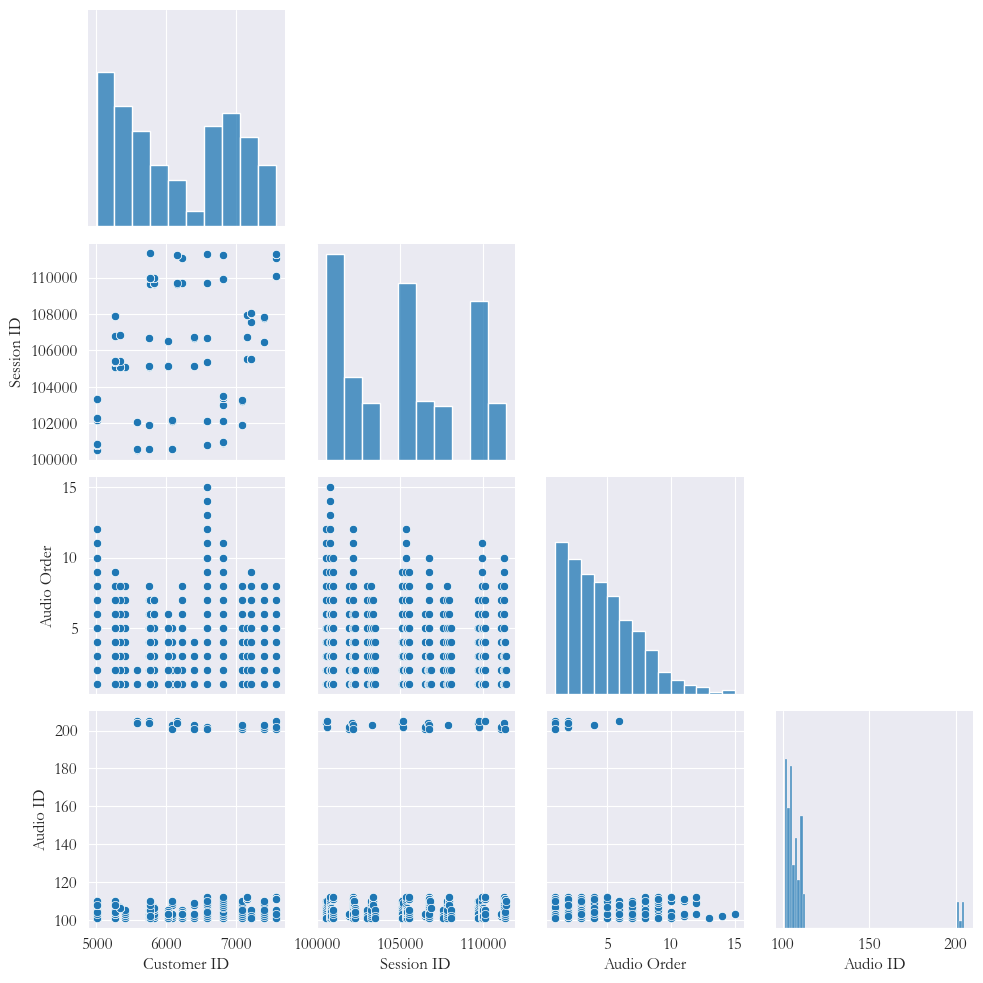

In [340]:
# Listening history dataset seems okay
sns.pairplot(data=listening_history, corner=True);

***iii. Looking for outliers in audio files dataset***

In [341]:
# audio files dataset seems okay
audio_files.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


***iv. Looking for outliers in session login dataset***

In [342]:
# session login dataset seems okay
session_login.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


#### f. Creating New Columns

****Creating a Cancelled column in customer_data dataframe with 0 represnting not_cancelled and 1 representing cancelled****

In [343]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT


In [344]:
customer_data = customer_data.assign(Cancelled = np.where(customer_data['Cancellation Date'].notna(), 1, 0))

In [345]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


## 4. Exploratory Data Analysis - EDA

##### EDA on Customer_Data 

In [346]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


In [347]:
# How long were customers members before they cancelled?
days_before_cancellation=(((customer_data[customer_data['Cancelled']==1]['Cancellation Date']) 
                           - (customer_data[customer_data['Cancelled']==1]['Member Since']))
                          .dt.days
                          .mean()
                         )
days_before_cancellation

46.30769230769231

The average days before cancellation are 46 days. This means clients are cancelling their subscription after one and a half months of subscriptin to maven music services. But this is based on three months data.

In [348]:
# Cancellation rate for those who had a discount
discouted = customer_data[(customer_data['Discount?']=='Yes')]
discouted

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01,1


In [349]:
discouted.Cancelled.sum() # number of cancelled clients with discount
discouted.Cancelled.count() # number of discounted clients
discounted_cancellation_rate = discouted.Cancelled.sum() / discouted.Cancelled.count() # Rate of cancelletion for discounted clients
discounted_cancellation_rate

0.8571428571428571

85 percent of clients who had a discount cancelled their subscription.

In [350]:
# Cancellation rate for those who did not have a discount
not_discouted = customer_data[~(customer_data['Discount?']=='Yes')] #slice using ~
not_discouted.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


In [351]:
not_discouted.Cancelled.sum() # number of cancelled clients without discount
not_discouted.Cancelled.count() # number of nondiscounted clients
non_discounted_cancellation_rate = not_discouted.Cancelled.sum() / not_discouted.Cancelled.count() # Rate of cancelletion for nondiscounted clients
non_discounted_cancellation_rate

0.30434782608695654

only 30 percent of non_discounted clients cancelled their subscription

In [352]:
# Check which subscription plan has more cancellations
grouped_data = customer_data.groupby(['Subscription Plan'])['Cancelled'].sum().to_frame().reset_index()
grouped_data['Subscription Plan'] = grouped_data['Subscription Plan'].str.replace(' (Ads)','').str.replace(' (No Ads)', '')
grouped_data

,Subscription Plan,Cancelled
0,Basic,4
1,Premium,9


The premium plan has the highest cancellations

In [353]:
# Check premium clients with discount
discounted_premium_clients = customer_data.loc[((customer_data['Subscription Plan']=='Premium (No Ads)')&(customer_data['Discount?']=='Yes'))]
discounted_premium_clients.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1


In [354]:
#Rate of cancelled premium clients with discount
discounted_premium_clients['Cancelled'].sum()/grouped_data.iloc[1,1]

0.6666666666666666

66 percent of the premium clients who cancelled had a discount

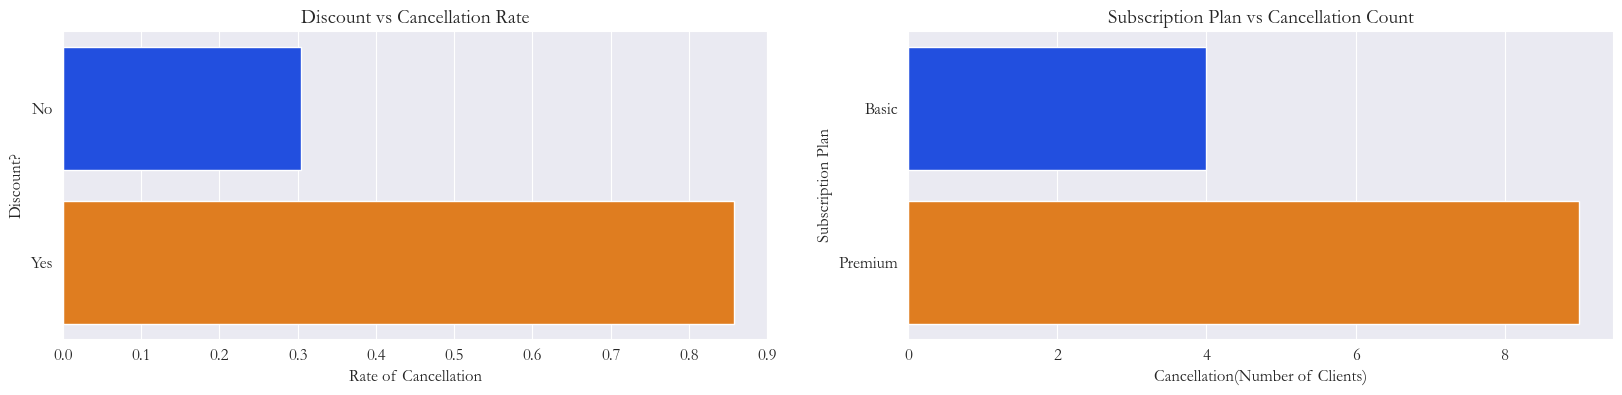

In [355]:
# Visualize the cancellation rate for those with a discount vs those without a discount
fig, ax = plt.subplots(1,2, figsize=(20, 4), 
                      )
ax[0].set_title('Discount vs Cancellation Rate')
ax[0].set_xlabel('Rate of Cancellation')
sns.barplot(data=customer_data, y='Discount?', x='Cancelled', errorbar=('ci', False), palette='bright', hue='Discount?', ax=ax[0]);

ax[1].set_title('Subscription Plan vs Cancellation Count')
ax[1].set_xlabel('Cancellation(Number of Clients)')
sns.barplot(data=grouped_data, y='Subscription Plan', x='Cancelled', errorbar=('ci', False), palette='bright', hue='Subscription Plan', ax=ax[1]);

***Insights from customer data***
1. The rate of service cancellation is high among discounted clients - 85%
2. Premium clients are have the highest cancellation count
3. 66% of premium client who have cancelled their subscription had a discount
4. Cancellation seems to be occuring approximately one and half month after subscription

***Discount seems to be a factor to cancellation hence further analysis and more data is required to establish below***
1. Discount rate for premium clients
2. Timeperiod that the discount applies after subscription

### EDA on listening History and other audio datasets
Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [356]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [357]:
audio_files.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [358]:
# Numeric part of ID column in audio_files is similar to Audio ID column in listening_history
#Splitting ID column in audio_files audio type and audio ID column
audio_files[['Audio Type', 'Audio ID']] = audio_files['ID'].str.split('-', expand=True)
audio_files['Audio ID'] = audio_files['Audio ID'].astype('int')

In [359]:
audio_files.head()

,ID,Name,Genre,Popularity,Audio Type,Audio ID
0,Song-101,Dance All Night,Pop,1,Song,101
1,Song-102,Unbreakable Beat,Pop,2,Song,102
2,Song-103,Sunset Boulevard,Pop,5,Song,103
3,Song-104,Glowing Hearts,Pop,10,Song,104
4,Song-105,Pop Rocks,Pop,52,Song,105


In [369]:
#Dropping unnecessary columns
audio_files_clean = audio_files.drop(labels=['ID', 'Audio Type'], axis=1)
audio_files_clean.head()

,Name,Genre,Popularity,Audio ID
0,Dance All Night,Pop,1,101
1,Unbreakable Beat,Pop,2,102
2,Sunset Boulevard,Pop,5,103
3,Glowing Hearts,Pop,10,104
4,Pop Rocks,Pop,52,105


In [360]:
session_login.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [372]:
#Merging the audio, session and listening history data
audio_listening_data = listening_history.merge(audio_files_clean, how='left', on='Audio ID').merge(session_login, how='left', on='Session ID')
audio_listening_data.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity,Session Log In Time
0,5001,100520,1,101,Song,Dance All Night,Pop,1,2023-03-13 18:29:00
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2,2023-03-13 18:29:00
2,5001,100520,3,103,Song,Sunset Boulevard,Pop,5,2023-03-13 18:29:00
3,5001,100520,4,104,Song,Glowing Hearts,Pop,10,2023-03-13 18:29:00
4,5001,100520,5,105,Song,Pop Rocks,Pop,52,2023-03-13 18:29:00


In [384]:
audio_listening_data['Session Log In Time'].dt.date.diff(30)

0         NaT
1         NaT
2         NaT
3         NaT
4         NaT
        ...  
500    7 days
501   10 days
502   10 days
503    8 days
504    8 days
Name: Session Log In Time, Length: 505, dtype: timedelta64[ns]

In [388]:
# The number of listening sessions that each customer had in the past 3 months
listening_sessions_per_client = audio_listening_data.groupby('Customer ID')['Session ID'].nunique().to_frame().reset_index()
listening_sessions_per_client

,Customer ID,Session ID
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4
5,5404,1
6,5581,3
7,5759,2
8,5761,3
9,5763,6


In [391]:
#Average sessions per client
listening_sessions_per_client['Session ID'].mean()

3.0

In [390]:
# The most popular genres that customers listened to
audio_listening_data['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [457]:
merged_df = customer_data.merge(audio_listening_data, how='left', on='Customer ID')
merged_df.groupby('Audio Type')['Cancelled'].sum()

Audio Type
Podcast     21
Song       154
Name: Cancelled, dtype: int32

In [458]:
merged_df.groupby('Genre')['Cancelled'].sum()

Genre
Comedy         15
Country         0
Hip Hop        12
Jazz            0
Pop           147
True Crime      1
Name: Cancelled, dtype: int32

***Insights from Listening History***
1. average sessions for the past three months is 3
2. The most popular genre is pop
3. There are two audio types - Songs and Podcasts
4. Most of the clients who cancelled their subscription listened to songs and pop songs in particular

## 5. Preping Data for Modeling

In [404]:
customer_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


In [ ]:
# Create a dataframe ready for modeling
model_df = customer_data[['Customer ID', 'Subscription Plan', 'Discount?', 'Cancelled']]
model_df['Subscription Plan'] = np.where(model_df['Subscription Plan']=='Basic (Ads)', 0, 1)
model_df['Discount?'] = np.where(model_df['Discount?']=='No', 0, 1)

In [448]:
model_df.head()

,Customer ID,Subscription Plan,Discount?,Cancelled
0,5001,0,0,0
1,5002,0,0,0
2,5004,0,0,1
3,5267,0,0,0
4,5338,0,0,0


In [449]:
audio_files.head()

,ID,Name,Genre,Popularity,Audio Type,Audio ID
0,Song-101,Dance All Night,Pop,1,Song,101
1,Song-102,Unbreakable Beat,Pop,2,Song,102
2,Song-103,Sunset Boulevard,Pop,5,Song,103
3,Song-104,Glowing Hearts,Pop,10,Song,104
4,Song-105,Pop Rocks,Pop,52,Song,105


In [450]:
# Calculate the number of listening sessions for each customer
unique_sessions = listening_history.groupby('Customer ID')['Session ID'].nunique().to_frame().reset_index()
unique_sessions.head()

,Customer ID,Session ID
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [451]:
# Merge the unique sessions DF to model df
model_df = model_df.merge(unique_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Subscription Plan,Discount?,Cancelled,Session ID
0,5001,0,0,0,8
1,5002,0,0,0,4
2,5004,0,0,1,1
3,5267,0,0,0,7
4,5338,0,0,0,4


In [452]:
# Audio consumprion by each client
all_audio = (pd.concat([audio_listening_data['Customer ID'],
                        pd.get_dummies(audio_listening_data['Genre'],
                                       dtype='int')],
                       axis=1)
             .groupby('Customer ID')
             .agg('sum')
            ).assign(Total_Audio=lambda x: x.sum(axis=1)).reset_index()

all_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total_Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [453]:
#Percentage pop and podcasts
all_audio = all_audio.assign(PercentPop=all_audio['Pop']/all_audio['Total_Audio'] * 100,
                 PercentPodcast=(all_audio['Comedy']+all_audio['True Crime'])/all_audio['Total_Audio'] * 100)
all_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total_Audio,PercentPop,PercentPodcast
0,5001,0,0,26,0,34,0,60,56.666667,0.0
1,5002,0,22,0,0,0,0,22,0.000000,0.0
2,5004,0,0,0,0,9,0,9,100.000000,0.0
3,5267,0,0,22,0,23,0,45,51.111111,0.0
4,5338,0,18,0,0,0,0,18,0.000000,0.0


In [460]:
# all_audio df slice
slice_all_audio = all_audio[['Customer ID', 'PercentPop', 'PercentPodcast']]
slice_all_audio.head()

,Customer ID,PercentPop,PercentPodcast
0,5001,56.666667,0.0
1,5002,0.000000,0.0
2,5004,100.000000,0.0
3,5267,51.111111,0.0
4,5338,0.000000,0.0


In [462]:
model_df = model_df.merge(slice_all_audio, how='left', on='Customer ID')
model_df.head()

,Customer ID,Subscription Plan,Discount?,Cancelled,Session ID,PercentPop,PercentPodcast
0,5001,0,0,0,8,56.666667,0.0
1,5002,0,0,0,4,0.000000,0.0
2,5004,0,0,1,1,100.000000,0.0
3,5267,0,0,0,7,51.111111,0.0
4,5338,0,0,0,4,0.000000,0.0


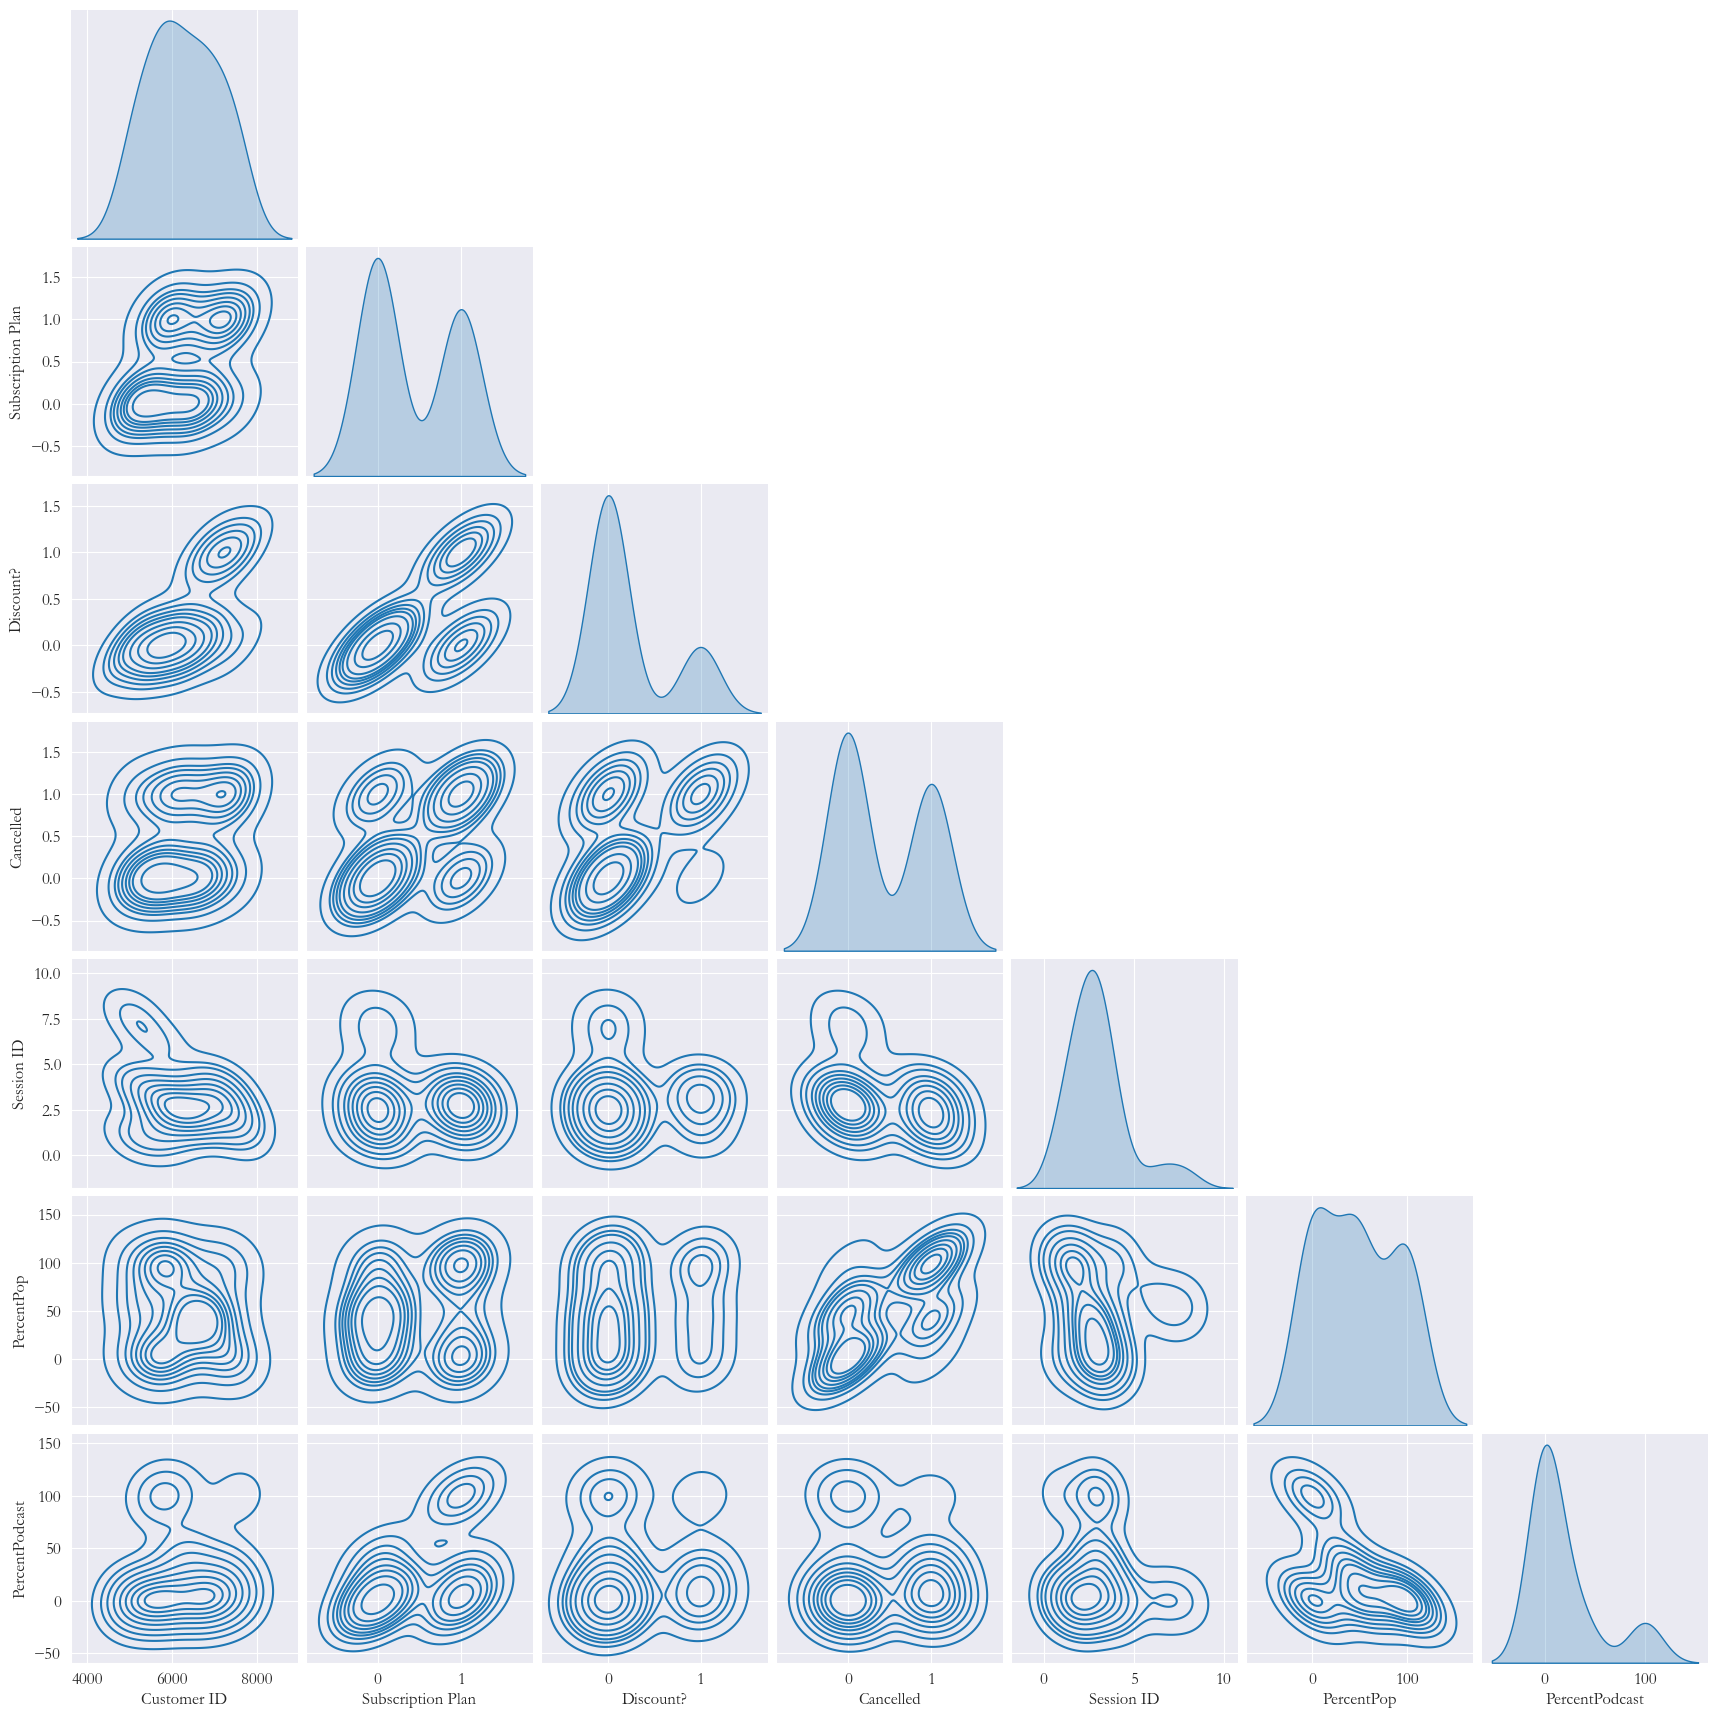

In [469]:
sns.pairplot(model_df, corner=True, kind='kde');

In [464]:
model_df.corr()

,Customer ID,Subscription Plan,Discount?,Cancelled,Session ID,PercentPop,PercentPodcast
Customer ID,1.000000,0.374048,0.648514,0.269942,-0.337083,-0.076129,0.083083
Subscription Plan,0.374048,1.000000,0.630867,0.457014,-0.166870,0.129733,0.417871
Discount?,0.648514,0.630867,1.000000,0.471825,-0.048877,0.112675,0.062938
Cancelled,0.269942,0.457014,0.471825,1.000000,-0.333739,0.585630,-0.035414
Session ID,-0.337083,-0.166870,-0.048877,-0.333739,1.000000,-0.131156,-0.125459
PercentPop,-0.076129,0.129733,0.112675,0.585630,-0.131156,1.000000,-0.487193
PercentPodcast,0.083083,0.417871,0.062938,-0.035414,-0.125459,-0.487193,1.000000


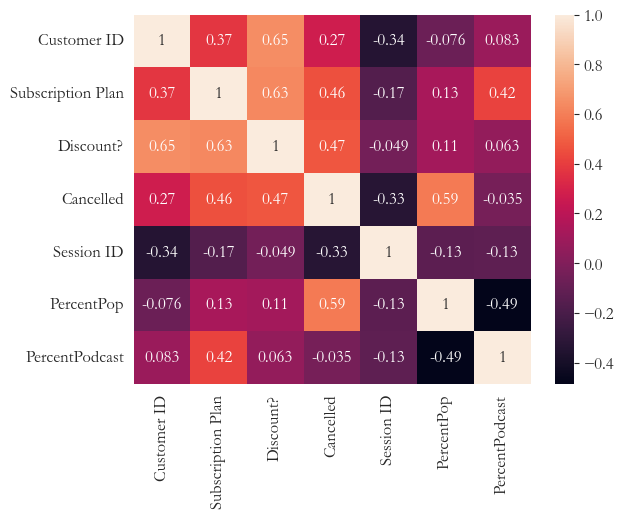

In [468]:
sns.heatmap(data=model_df.corr(), annot=True);

In [ ]:
#Observations
#1. There is a correlation between cancellation and [subscription plan & Discount & Pop Music]
#2. The higher the sessions the lower the cancellation